<a href="https://colab.research.google.com/github/nfava/Data-Analysis-App/blob/main/Research_Metadata_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = '/content/Research IRM Questionaire answer sheet .xlsx'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
file_path = '/content/Research IRM Questionaire answer sheet .xlsx'
df = pd.read_excel(file_path)

# Display first few rows
df.head()


,Participant Identifier,Ride share usage per week,Avg. Cost ($),Safety (1–5),City,Avg. Minutes,Use Ride Sharing,Tip?,Weather Affects?,Price Affects?,Most Used Service
0,1,5,12,4,Chicago,25,Yes,Sometimes,Yes,Yes,Lyft
1,2,1,33,2,New York,27,Yes,Yes,Yes,Yes,Uber
2,3,3,15,0,Seattle,20,No,No,No,Yes,Uber
3,4,6,23,3,Vancouver,10,Yes,Yes,No,Yes,Lyft
4,5,4,32,2,Toronto,10,Yes,Yes,Yes,Yes,Uber


In [ ]:
print(df.info())
print(df.describe(include='all'))

df.replace('N/A', pd.NA, inplace=True)
df.dropna(subset=['Most Used Service'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Participant Identifier     40 non-null     int64 
 1   Ride share usage per week  40 non-null     int64 
 2   Avg. Cost ($)              40 non-null     int64 
 3   Safety (1–5)               40 non-null     int64 
 4   City                       40 non-null     object
 5   Avg. Minutes               40 non-null     int64 
 6   Use Ride Sharing           40 non-null     object
 7   Tip?                       40 non-null     object
 8   Weather Affects?           40 non-null     object
 9   Price Affects?             40 non-null     object
 10  Most Used Service          34 non-null     object
dtypes: int64(5), object(6)
memory usage: 3.6+ KB
None
        Participant Identifier  Ride share usage per week  Avg. Cost ($)  \
count                40.000000                   40

/tmp/ipython-input-1509859747.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Most Used Service', y='Avg. Cost ($)', estimator='mean', ci=None)


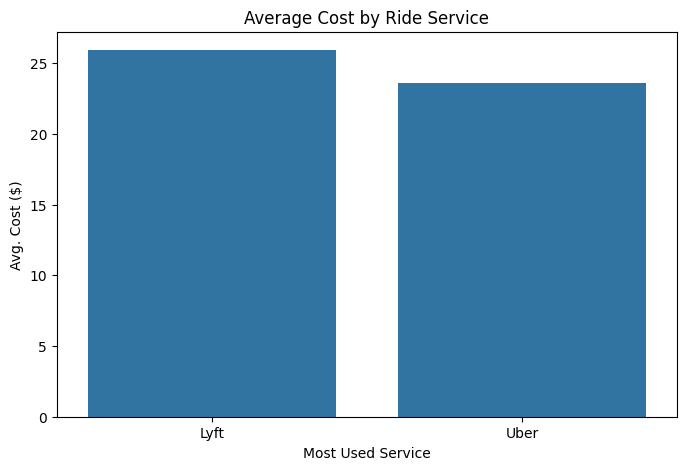

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Most Used Service', y='Avg. Cost ($)', estimator='mean', ci=None)
plt.title('Average Cost by Ride Service')
plt.show()


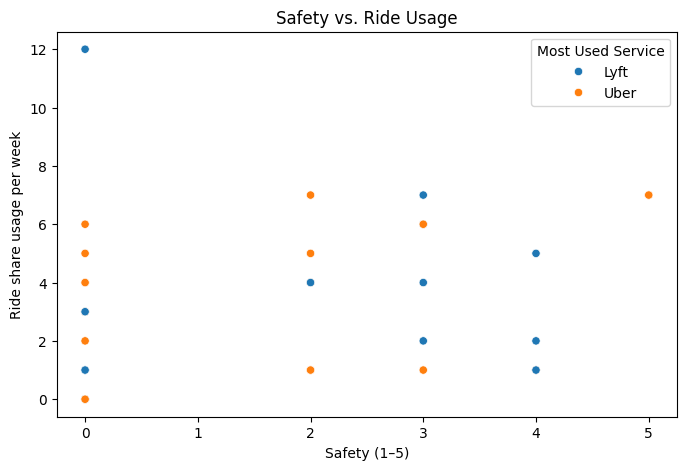

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Safety (1–5)', y='Ride share usage per week', hue='Most Used Service')
plt.title('Safety vs. Ride Usage')
plt.show()


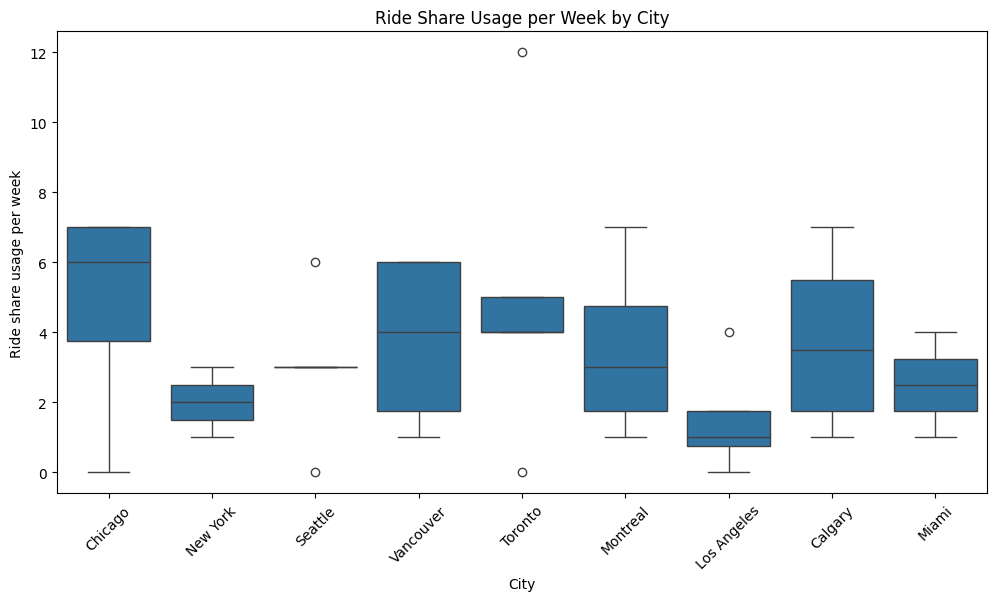

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='City', y='Ride share usage per week')
plt.xticks(rotation=45)
plt.title('Ride Share Usage per Week by City')
plt.show()


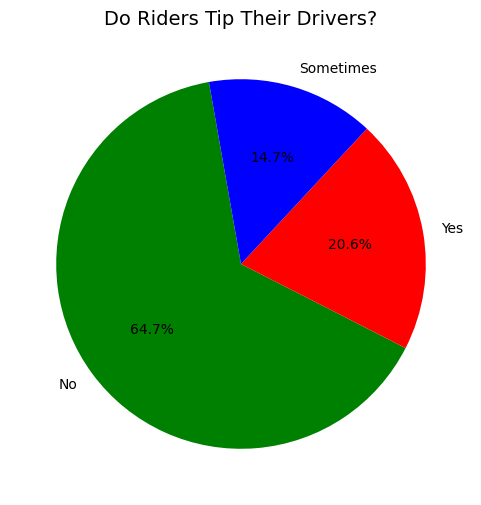

In [ ]:
plt.figure(figsize=(6,6))
tip_counts = df['Tip?'].value_counts()

plt.pie(
    tip_counts.values,
    labels=tip_counts.index,
    autopct='%1.1f%%',
    startangle=100,
    colors=['green','red','blue','white']
)
plt.title('Do Riders Tip Their Drivers?', fontsize=14)
plt.show()

/tmp/ipython-input-1251289903.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-1251289903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


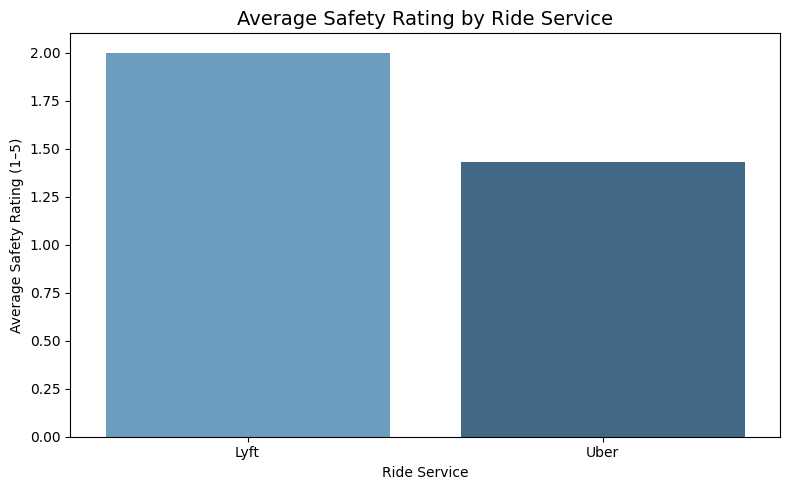

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='Most Used Service',
    y='Safety (1–5)',
    estimator='mean',
    ci=None,
    palette='Blues_d'
)
plt.title('Average Safety Rating by Ride Service', fontsize=14)
plt.ylabel('Average Safety Rating (1–5)')
plt.xlabel('Ride Service')
plt.tight_layout()
plt.show()